In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, r2_score
import warnings
import os


In [2]:
df1 = pd.read_excel('datasets/case_study1.xlsx')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [5]:
df2 = pd.read_excel("datasets/case_study2.xlsx")

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [7]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [8]:
data3 = pd.read_excel("datasets/Features_Target_Description.xlsx")

In [9]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Case_study1 table  4 non-null      object
 1   Variable Name      86 non-null     object
 2   Description        84 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [10]:
data3.head()

,Case_study1 table,Variable Name,Description
0,Internal,Total_TL,Total trade lines/accounts in Bureau
1,NaN,Tot_Closed_TL,Total closed trade lines/accounts
2,NaN,Tot_Active_TL,Total active accounts
3,NaN,Total_TL_opened_L6M,Total accounts opened in last 6 Months
4,NaN,Tot_TL_closed_L6M,Total accounds closes in last 6 months


In [11]:

print(df1.shape, df2.shape)
def check_missing_values(df):
    total_datapoints = df.shape[0]
    dct_df = {}
    for col in df.columns:
        dct_df[col] = 0
        for row_point in df.loc[:, col]:
            if row_point==-99999:
                dct_df[col] += 1
    return dct_df


(51336, 26) (51336, 62)


In [12]:
# remove nulls, here  -99999 represents missing values
# cols have -99999 in df1
print(check_missing_values(df1))
# here 40 missing values are present in df1.Age_Oldest_TL and Age_Newest_TL dataset 
l1 = list(df1.loc[df1['Age_Oldest_TL'] == -99999]['PROSPECTID'])
l2 = list(df1.loc[df1['Age_Newest_TL'] == -99999]['PROSPECTID'])
print(l1==l2)
# true. so we can say that both cols have same pid whose age values are missing. so we are going to drop that datapoints.
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

{'PROSPECTID': 0, 'Total_TL': 0, 'Tot_Closed_TL': 0, 'Tot_Active_TL': 0, 'Total_TL_opened_L6M': 0, 'Tot_TL_closed_L6M': 0, 'pct_tl_open_L6M': 0, 'pct_tl_closed_L6M': 0, 'pct_active_tl': 0, 'pct_closed_tl': 0, 'Total_TL_opened_L12M': 0, 'Tot_TL_closed_L12M': 0, 'pct_tl_open_L12M': 0, 'pct_tl_closed_L12M': 0, 'Tot_Missed_Pmnt': 0, 'Auto_TL': 0, 'CC_TL': 0, 'Consumer_TL': 0, 'Gold_TL': 0, 'Home_TL': 0, 'PL_TL': 0, 'Secured_TL': 0, 'Unsecured_TL': 0, 'Other_TL': 0, 'Age_Oldest_TL': 40, 'Age_Newest_TL': 40}
True


In [13]:
dct_df2 = check_missing_values(df2)
print(dct_df2)

# there so many datapoints that have missing values
# so we drop those cols whose have missing values more than 10000

columns_to_be_removed = []

for key, value in dct_df2.items():
    if value>10000:
        columns_to_be_removed .append(key)
        
print(columns_to_be_removed)
df2 = df2.drop(columns_to_be_removed, axis =1)

# droping those rows whose has -99999
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]


{'PROSPECTID': 0, 'time_since_recent_payment': 4291, 'time_since_first_deliquency': 35949, 'time_since_recent_deliquency': 35949, 'num_times_delinquent': 0, 'max_delinquency_level': 35949, 'max_recent_level_of_deliq': 0, 'num_deliq_6mts': 0, 'num_deliq_12mts': 0, 'num_deliq_6_12mts': 0, 'max_deliq_6mts': 12890, 'max_deliq_12mts': 10832, 'num_times_30p_dpd': 0, 'num_times_60p_dpd': 0, 'num_std': 0, 'num_std_6mts': 0, 'num_std_12mts': 0, 'num_sub': 0, 'num_sub_6mts': 0, 'num_sub_12mts': 0, 'num_dbt': 0, 'num_dbt_6mts': 0, 'num_dbt_12mts': 0, 'num_lss': 0, 'num_lss_6mts': 0, 'num_lss_12mts': 0, 'recent_level_of_deliq': 0, 'tot_enq': 6321, 'CC_enq': 6321, 'CC_enq_L6m': 6321, 'CC_enq_L12m': 6321, 'PL_enq': 6321, 'PL_enq_L6m': 6321, 'PL_enq_L12m': 6321, 'time_since_recent_enq': 6321, 'enq_L12m': 6321, 'enq_L6m': 6321, 'enq_L3m': 6321, 'MARITALSTATUS': 0, 'EDUCATION': 0, 'AGE': 0, 'GENDER': 0, 'NETMONTHLYINCOME': 0, 'Time_With_Curr_Empr': 0, 'pct_of_active_TLs_ever': 0, 'pct_opened_TLs_L6m_of

In [14]:
# now clear the datasets
# we combine both dataset horizontally based on prospectid

# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

print(df.shape)
df.head()

PROSPECTID
(42064, 79)


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


# Feature selection for training

In [15]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)


MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [16]:
# Chi-Square test is a statistical method used to determine if there is a significant association between two categorical variables which are 
# target col and other independent categorical col
# Chi-square test(checking for categorical to categorical association)
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

# Since all p-values are extremely low (< 0.05), all these categorical features are significantly 
# associated with Approved_Flag and should be considered for model training.

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [17]:

# VIF for numerical columns
# to check multicollinearity between features
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

# Varience Inflation Factor sequentially check
vif_data = df[numeric_columns]
print(vif_data.shape)
total_cols = vif_data.shape[1]
columns_to_be_kept = []
columns_to_be_drop = []
col_indx = 0

for i in range(0, total_cols):
    vif_val = variance_inflation_factor(vif_data, col_indx)
    # print(i, col_indx, vif_val, end=" *-* ")
    # A VIF > 5 or 10 means a feature should be removed to improve model performance
    if vif_val <=6:
        columns_to_be_kept.append(numeric_columns[i])
        col_indx +=1
    else:
        # print(numeric_columns[i]) # cols to drop because it is highly correlated with other features
        columns_to_be_drop.append(numeric_columns[i])
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)
print('columns_to_be_kept : ',columns_to_be_kept)
print('columns_to_be_drop : ',columns_to_be_drop)

(42064, 72)


C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


columns_to_be_kept :  ['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'num_lss_12mts', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']
columns_to_be_drop :  ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'pct_tl_open_L12M', 'Auto_TL', 'Consumer_TL', 'Gold_TL', 'num_times_delinquent', 'num_deliq_6mts', 'num_deliq_12mts', 'num_tim

In [18]:
# checking anova for columns_to_be_kept
# ANOVA compares means across multiple groups.
# It helps in feature selection by checking if a numeric variable significantly differs across categories.
# If p ≤ 0.05, we keep the feature because it provides useful information for classification
from scipy.stats import f_oneway
cols_to_be_kept_numeric = []

for col in columns_to_be_kept:
    a = list(df[col])
    b = list(df['Approved_Flag'])
    # print(a[:10],b[:10], col)

    group_p1 = [val for val, group in zip(a,b) if group=='P1']
    group_p2 = [val for val, group in zip(a,b) if group=='P2']
    group_p3 = [val for val, group in zip(a,b) if group=='P3']
    group_p4 = [val for val, group in zip(a,b) if group=='P4']

    f_statistic, p_value = f_oneway(group_p1, group_p2, group_p3, group_p4)
    if p_value <= 0.05:
        cols_to_be_kept_numeric.append(col)
print(cols_to_be_kept_numeric)

['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


In [19]:
# listing all the final features
features = cols_to_be_kept_numeric + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

# feature selection is done for cat and num features

In [20]:
print(df.shape)
df.info()

(42064, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 n

In [21]:
# as we can see there are some features with object datatype,
# also our target feature is also an object so convert them into numerical

# Label encoding for the categorical independent features
cat_ind_cols = ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

print(df['MARITALSTATUS'].unique())    
print(df['EDUCATION'].unique())
print(df['GENDER'].unique())
print(df['last_prod_enq2'].unique())
print(df['first_prod_enq2'].unique())

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [22]:
# Here EDUCATION is ordinal feature
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3
# Others has to be verified by the business end user 

df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3



In [23]:
print(df['EDUCATION'].dtype)
print(df['EDUCATION'].value_counts())
df['EDUCATION'] = df['EDUCATION'].astype(int)
print(df['EDUCATION'].dtype)

object
EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64
int32


In [24]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])
print(df_encoded.shape)
df_encoded.info()

(42064, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  in

In [25]:
df_encoded.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,...,42064.000000,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,...,1.230458,2.692990e+04,110.345783,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,...,2.069461,2.084300e+04,75.629967,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,2.400000e+04,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.333000,0.100000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,3.100000e+04,131.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,33.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,55.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [26]:
df.to_csv("PreprocessedData.csv")


# Machine Learing model fitting



In [26]:
print(df_encoded.max())

pct_tl_open_L6M                     1.0
pct_tl_closed_L6M                   1.0
Tot_TL_closed_L12M                   33
pct_tl_closed_L12M                  1.0
Tot_Missed_Pmnt                      34
CC_TL                                27
Home_TL                              10
PL_TL                                29
Secured_TL                          235
Unsecured_TL                         55
Other_TL                             80
Age_Oldest_TL                       385
Age_Newest_TL                       359
time_since_recent_payment          6065
max_recent_level_of_deliq           900
num_deliq_6_12mts                    20
num_times_60p_dpd                    52
num_std_12mts                       122
num_sub                              41
num_sub_6mts                          5
num_sub_12mts                        12
num_dbt                              35
num_dbt_12mts                        12
num_lss                              72
recent_level_of_deliq               900


In [34]:
# Data processing
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
# MinMax Scaler for data scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# label encoding for target feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [36]:
# Random Forrest

from sklearn.ensemble import RandomForestClassifier

rf_clsfr = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', random_state=42)

In [37]:
rf_clsfr.fit(x_train, y_train)
y_predict = rf_clsfr.predict(x_test)
train_accuracy = accuracy_score(y_train, rf_clsfr.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Train Accuracy: 0.9999702832010936
Test Accuracy: 0.7639367645310828
Class p1:
Precision: 0.8348946135831382
Recall: 0.703155818540434
F1 Score: 0.7633832976445396

Class p2:
Precision: 0.7958871515975526
Recall: 0.9282457879088206
F1 Score: 0.8569860005489981

Class p3:
Precision: 0.445859872611465
Recall: 0.21132075471698114
F1 Score: 0.2867383512544803

Class p4:
Precision: 0.7172874880611271
Recall: 0.7298347910592808
F1 Score: 0.7235067437379576



In [42]:
# XGBoost
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [43]:
xgb_classifier.fit(x_train, y_train)
y_predict = xgb_classifier.predict(x_test)
train_accuracy = accuracy_score(y_train, xgb_classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Train Accuracy: 0.8899586936495201
Test Accuracy: 0.7783192677998336
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [48]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
dt_classifier.fit(x_train, y_train)
y_predict = dt_classifier.predict(x_test)
train_accuracy = accuracy_score(y_train, dt_classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Train Accuracy: 0.9999702832010936
Test Accuracy: 0.7035540235350054
Class p1:
Precision: 0.7197265625
Recall: 0.7268244575936884
F1 Score: 0.7232580961727183

Class p2:
Precision: 0.8170682730923695
Recall: 0.8065411298315164
F1 Score: 0.8117705735660848

Class p3:
Precision: 0.3255287009063444
Recall: 0.32528301886792454
F1 Score: 0.3254058135145338

Class p4:
Precision: 0.6285714285714286
Recall: 0.6627793974732751
F1 Score: 0.6452223273415326



In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)

In [52]:
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
train_accuracy = accuracy_score(y_train, lr.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Train Accuracy: 0.7441383614157083
Test Accuracy: 0.7417092594793772
Class p1:
Precision: 0.8350125944584383
Recall: 0.6538461538461539
F1 Score: 0.7334070796460177

Class p2:
Precision: 0.7447202096500694
Recall: 0.957581764122894
F1 Score: 0.8378425251474159

Class p3:
Precision: 0.4228187919463087
Recall: 0.047547169811320754
F1 Score: 0.08548168249660787

Class p4:
Precision: 0.6948118006103764
Recall: 0.6637512147716229
F1 Score: 0.6789264413518886



In [54]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_jobs=-1)

In [55]:
knn_classifier.fit(x_train, y_train)
y_predict = knn_classifier.predict(x_test)
train_accuracy = accuracy_score(y_train, knn_classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Train Accuracy: 0.7271700692401415
Test Accuracy: 0.6205871864970879
Class p1:
Precision: 0.57
Recall: 0.39349112426035504
F1 Score: 0.46557759626604434

Class p2:
Precision: 0.6700669914738124
Recall: 0.8723488602576809
F1 Score: 0.757943683802635

Class p3:
Precision: 0.26791277258566976
Recall: 0.129811320754717
F1 Score: 0.17488561260803254

Class p4:
Precision: 0.49502982107355864
Recall: 0.24198250728862974
F1 Score: 0.32506527415143605



In [57]:
precision, recall, f1_score_rf, _ = precision_recall_fscore_support(y_test, rf_clsfr.predict(x_test))
precision, recall, f1_score_xgb, _ = precision_recall_fscore_support(y_test, xgb_classifier.predict(x_test))
precision, recall, f1_score_dt, _ = precision_recall_fscore_support(y_test, dt_classifier.predict(x_test))

In [61]:
plt.figure(figsize=(10, 10))
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    plt.bar(f1_score_rf)
    plt.

F1 Score: 0.7633832976445396
F1 Score: 0.8569860005489981
F1 Score: 0.2867383512544803
F1 Score: 0.7235067437379576


<Figure size 1000x1000 with 0 Axes>

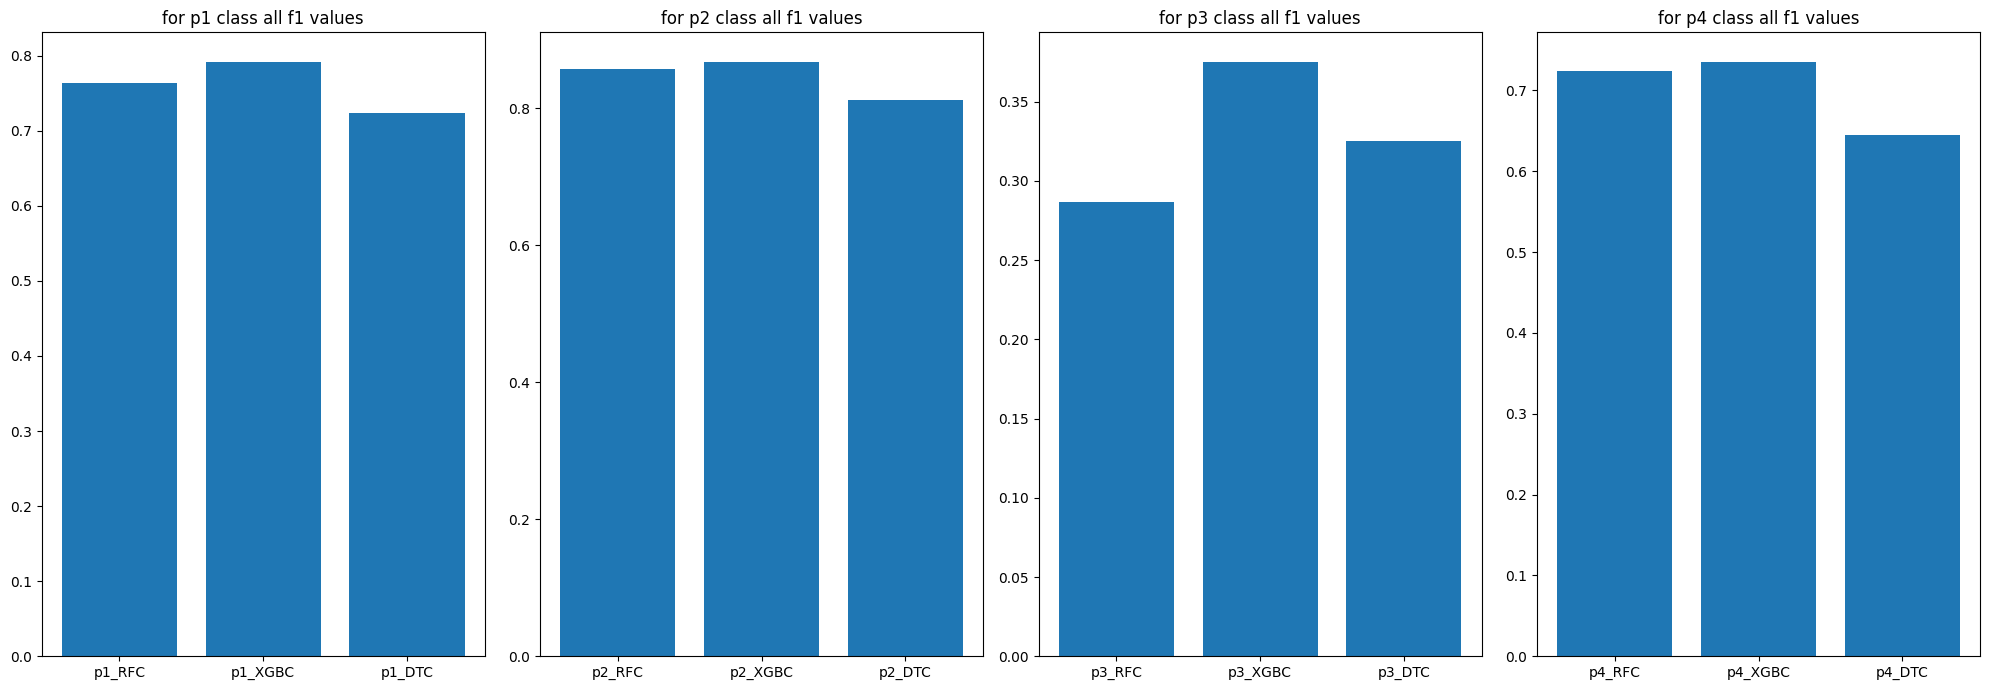

In [78]:
plt.figure(figsize=(20, 7))

for i, val in enumerate(['p1', 'p2', 'p3', 'p4']):
    plt.subplot(1, 4, i+1)
    plt.bar([val+"_RFC", val+"_XGBC", val+"_DTC"], [f1_score_rf[i],f1_score_xgb[i], f1_score_dt[i]])
    plt.title(f"for {val} class all f1 values")
plt.tight_layout()
plt.show()

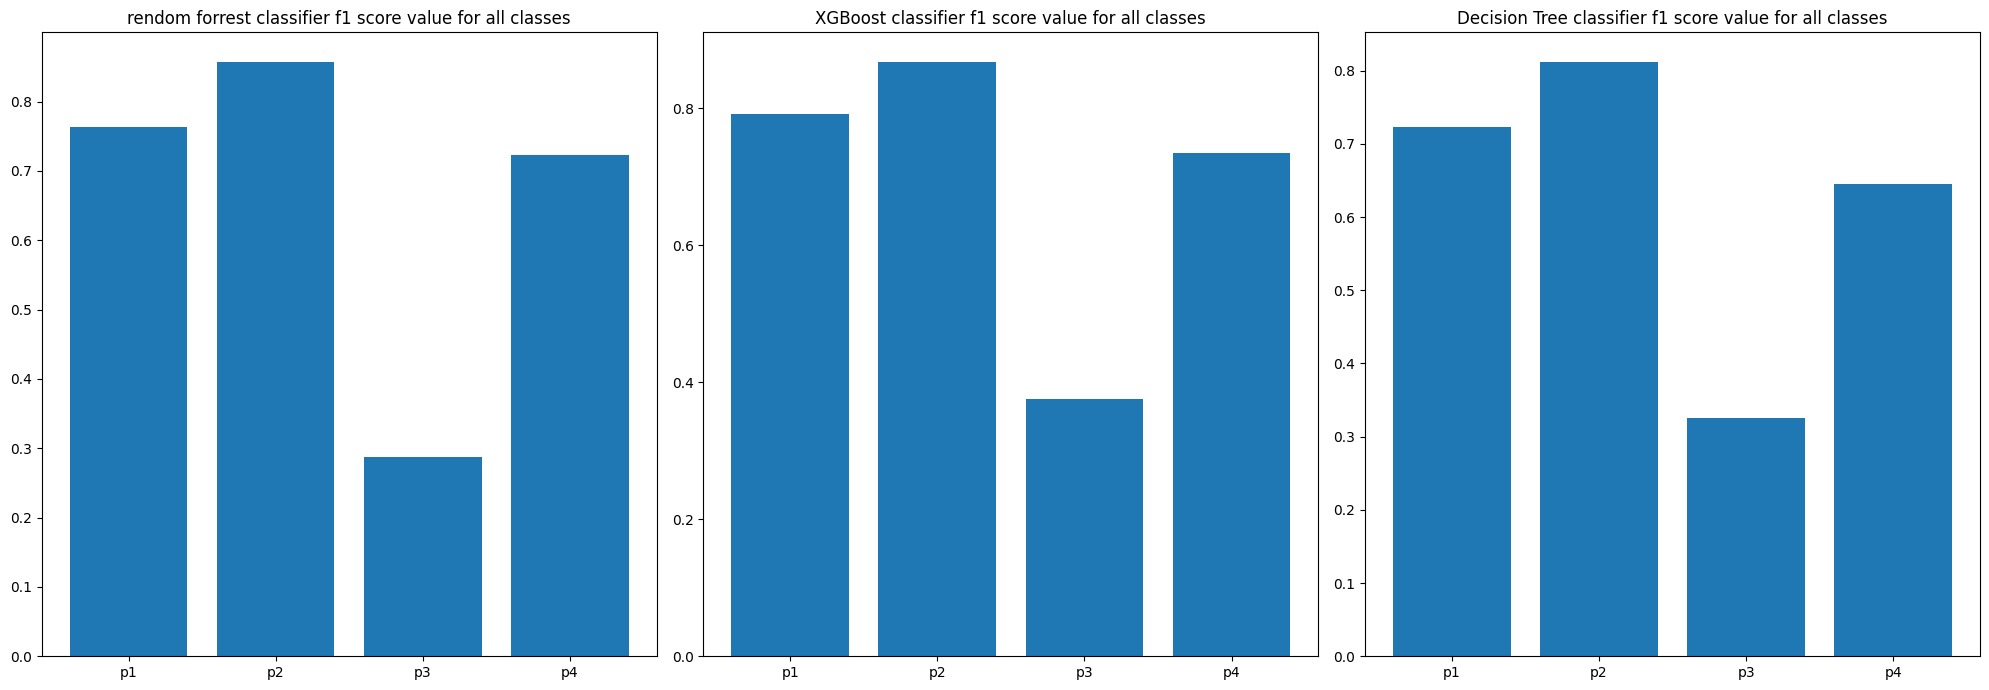

In [76]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.bar(['p1', 'p2', 'p3', 'p4'],f1_score_rf)
plt.title("rendom forrest classifier f1 score value for all classes")
plt.subplot(1, 3, 2)
plt.bar(['p1', 'p2', 'p3', 'p4'],f1_score_xgb)
plt.title("XGBoost classifier f1 score value for all classes")
plt.subplot(1, 3, 3)
plt.bar(['p1', 'p2', 'p3', 'p4'],f1_score_dt)
plt.title("Decision Tree classifier f1 score value for all classes")
plt.tight_layout()
plt.show()

# Hyperparameter tuning in xgboost using grid search cv

In [86]:
# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, booster='gbtree', n_jobs  = -1)

In [87]:
# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [1, 5, 10]
}

In [89]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)